In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
  

"""
fe : ratio of ethanol 
fpg : ratio of PG
Cm : experimental data of solubiluty in mixter based on ratio
Cw : solubility in pure water
Cpg : solubility in pure PG
Ce : solubility in pure ethanol
T : temperature
LCm,LCe, ... : log of Cm, ...

x , y : for finding j with regression

Sm : prediction data of solubility 
LSm : prediction data of log Sm

"""

'\nfe : ratio of ethanol \nfpg : ratio of PG\nCm : experimental data of solubiluty in mixter based on ratio\nCw : solubility in pure water\nCpg : solubility in pure PG\nCe : solubility in pure ethanol\nT : temperature\nLCm,LCe, ... : log of Cm, ...\n\nx , y : for finding j with regression\n\nSm : prediction data of solubility \nLSm : prediction data of log Sm\n\n'

In [65]:
# function for change molar to mole fraction
# density of solvent
de = 0.785
dw = 0.997
dpg = 1.0273
    # solvent Molecular weight
mw_w = 18
mw_e = 46
mw_pg = 76.09
def Mole_fraction (M, d1, d2, d3, mw_1, mw_2, mw_3 ):
    if len(M) <= 10 :
        f1 = [0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
        f2 = [0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5]
        f3 = [0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4]
        f1 = np.array(f1).reshape(-1,1)
        f2= np .array(f2).reshape(-1,1)
        f3= np .array(f3).reshape(-1,1)

    else:
        f1 = np.arange(0.1,0.8, 0.01)
        f2 = (1-f1)/2
        f3 = (1-f1)/2
    
    mol_1 = (f1*d1)/mw_1
    mol_2 = (f2*d2)/mw_2
    mol_3 = (f3*d3)/mw_3    
    X1 = mol_1/(mol_2+mol_1+mol_3)
    X2 = mol_2/(mol_2+mol_1+mol_3)
    X3 = mol_3/(mol_2+mol_1+mol_3)
    MW = X1*mw_1 + X2*mw_2 + X3*mw_3
    d = (f1*d1) + (f2*d2) + (f3*d3)
    m = (M/(1000*d))*MW
    Xe = m/(m+1)
    return (Xe, MW, d)
    #print('exp mole fraction = ' , Xe)


    
    
#   jouyban-Acree function for ternary mixture

def Jouyban_Acree (Cm, C1, C2, C3, d1, d2, d3):
    F1 = [0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
    F2 = [0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5]
    F3 = [0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4]
    F1 = np.array(F1).reshape(-1,1)
    F2= np .array(F2).reshape(-1,1)
    F3= np .array(F3).reshape(-1,1)
    
    # change v/v to w/w
    W1 = F1*d1
    W2 = F2*d2
    W3 = F3*d3
    f1 = W1/(W2+W1+W3)
    f2 = W2/(W2+W1+W3)
    f3 = W3/(W2+W1+W3)
    
    LCm = [math.log10(x) for x in Cm]
    LCm = np.array(LCm).reshape(-1,1)
    LC1 = math.log10(C1)
    LC2 = math.log10(C2)
    LC3 = math.log10(C3)
    

    x = LCm - ((f1 * LC1) + (f2 * LC2) + (f3 * LC3))
    y10 = (f1 * f2)/T
    y11 = (f1*f2*(f1-f2))/T
    y12 = (f1*f2*(f1-f2)*(f1-f2))/T
    reg10 = LinearRegression().fit(y10,x)
    reg11 = LinearRegression().fit(y11,x)
    reg12 = LinearRegression().fit(y12,x)
    j10 = float(reg10.coef_)
    j11 = float(reg11.coef_)
    j12 = float(reg12.coef_)
    #print('j0 = ',j0 , '\n' ,'j1 = ',j1 , '\n' , 'j2 = ',j2)
    
    y20 = (f1 * f3)/T
    y21 = (f1*f3*(f1-f3))/T
    y22 = (f1*f3*(f1-f3)*(f1-f3))/T
    reg20 = LinearRegression().fit(y20,x)
    reg21 = LinearRegression().fit(y21,x)
    reg22 = LinearRegression().fit(y22,x)
    j20 = float(reg20.coef_)
    j21 = float(reg21.coef_)
    j22 = float(reg22.coef_)
    #print('j20 = ',j20 , '\n' ,'j21 = ',j21 , '\n' , 'j22 = ',j22)

    y30 = (f2 * f3)/T
    y31 = (f2*f3*(f2-f3))/T
    y32 = (f2*f3*(f2-f3)*(f2-f3))/T
    reg30 = LinearRegression().fit(y30,x)
    reg31 = LinearRegression().fit(y31,x)
    reg32 = LinearRegression().fit(y32,x)
    j30 = float(reg30.coef_)
    j31 = float(reg31.coef_)
    j32 = float(reg32.coef_)
    #print('j30 = ',j30 , '\n' ,'j31 = ',j31 , '\n' , 'j32 = ',j32)
    '''
    y40 = (f1 * f2 * f3)/T
    y41 = (f1*f2*f3*(f1-f2-f3))/T
    y42 = (f1*f2*f3*(f1-f2-f3)*(f1-f2-f3))/T
    reg40 = LinearRegression().fit(y40,x)
    reg41 = LinearRegression().fit(y41,x)
    reg42 = LinearRegression().fit(y42,x)
    j40 = float(reg40.coef_)
    j41 = float(reg41.coef_)
    j42 = float(reg42.coef_)
    print('j40 = ',j40 , '\n' ,'j41 = ',j41 , '\n' , 'j42 = ',j42)
    '''
    
    F12 = [0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
    F22 = [0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5]
    F32 = [0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4]
    F12 = np.array(F12).reshape(-1,1)
    F22= np .array(F22).reshape(-1,1)
    F32= np .array(F32).reshape(-1,1)
        
    # change v/v to w/w
    W1 = F12*d1
    W2 = F22*d2
    W3 = F32*d3
    f12 = W1/(W2+W1+W3)
    f22 = W2/(W2+W1+W3)
    f32 = W3/(W2+W1+W3)    
    
    f12 = np.arange(0.1,0.8, 0.01)
    f22 = (1-f12)/2
    f32 = (1-f12)/2


    A1 = (f12*f22/T)*(j10 + (j11 * (f12-f22)) + (j12*(f12-f22)*(f12-f22)))
    A2 = (f12*f32/T)*(j20 + (j21 * (f12-f32)) + (j22*(f12-f32)*(f12-f32)))
    A3 = (f22*f32/T)*(j30 + (j31 * (f22-f32)) + (j32*(f22-f32)*(f22-f32)))
    #A4 = (f12*f22*f32/T)*(j40 + (j41 * (f12-f22-f32)) + (j42*(f12-f22-f32)*(f12-f22-f32)))


    LSm = ((f12 * LC1) + (f22 * LC2) + (f32 * LC3)) + A1 + A2 + A3 
    Sm = 10**LSm

    #print ('X_calc =', Sm)




    return (Sm)

    
    
    
#### function EHSA

def EHSA (exp_data, T_fusion, dH_fusion, D_SP, D_V, sp1, sp2, sp3, d1, d2, d3, mw_1, mw_2, mw_3):
    
    Xe, MW, d = Mole_fraction(exp_data, d1, d2, d3, mw_1, mw_2, mw_3)
    
    f1 = [0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
    f2 = [0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5]
    f3 = [0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4]
    f1 = np.array(f1).reshape(-1,1)
    f2= np .array(f2).reshape(-1,1)
    f3= np .array(f3).reshape(-1,1)
    
    
    spmix = (f1*sp1) + (f2*sp2) + (f3*sp3)
    
    # T0 : heat fusion temp
    T0 = T_fusion
    # dF : heat of fusion cal/mole
    dHf = dH_fusion
    # sp = drug Solubilitty parameter (cal/cm3)^0.5
    sp = D_SP
    # V2 = drug molar volume (cm3/mole)
    V2 = D_V
    
    # solvent molar volume (cm3/mole)
    V1 =  MW/d
    
    # volume fraction
    Q = 1
    #Q = (V1*(1-Xe))/((V1*(1-Xe)) + V2*Xe)
    #print ('Q', Q)
    
    # A coeficent
    A = (V2*Q)/(R*T)

    LXi = (dHf/(2.303*R*T)) * ((T0-T)/T0)
    #LXi = (dHf/(2.303*R*T)) * (math.log10(T0/T))
    Xi = 10**(-LXi)
    # ideal solubility
    # calculate the W_exp
    W = ((np.log10(Xi/Xe)/A) + sp**2 + spmix**2)*0.5
    
    #### polynomial regression for EHSA ####
    # Importing the dataset
    ## x = data, y = quadratic equation
    x = spmix
    x1 = x.reshape(-1, 1)
    y = W
    '''
    plt.scatter(x, y, s = 10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Non Linear Data')

    '''
    poly_features = PolynomialFeatures(degree = 2, include_bias = False)
    x_poly = poly_features.fit_transform(x1)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    #print('Coefficients of x are', lin_reg.coef_)
    #print('Intercept is', lin_reg.intercept_)

    y_deg2 = lin_reg.predict(x_poly)
    # model evaluation
    mse_deg2 = mean_squared_error(y, y_deg2)

    r2_deg2 = r2_score(y, y_deg2)

    # printing values
    #print('MSE of Polyregression model', mse_deg2)
    #print('R2 score of Linear model: ', r2_deg2)

    # calculation of W_calc , X_calc
    Q2 = 1
    #f12 = np.arange(0,1.01, 0.01)
    #f22 = 1-f12
    f12 = [0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
    f22 = [0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5]
    f32 = [0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4]
    f12 = np.array(f12).reshape(-1,1)
    f22= np .array(f22).reshape(-1,1)
    f32= np .array(f32).reshape(-1,1)
    
    f12 = np.arange(0.1,0.8, 0.01)
    f22 = (1-f12)/2
    f32 = (1-f12)/2
    spmix2 = (f12*sp1) + (f22*sp2) + (f32*sp3)
    
    
    
    A2 = (V2*Q2)/(R*T)
    
    mol_1 = (f12*d1)/mw_1
    mol_2 = (f22*d2)/mw_2
    mol_3 = (f32*d3)/mw_3    
    X1 = mol_1/(mol_2+mol_1+mol_3)
    X2 = mol_2/(mol_2+mol_1+mol_3)
    X3 = mol_3/(mol_2+mol_1+mol_3)
    MW = X1*mw_1 + X2*mw_2 + X3*mw_3
    d = (f12*d1) + (f22*d2) + (f32*d3)

    
    V1 =  MW/d

    for i in range (1):
        Q3 = Q2
        W_calc =  lin_reg.intercept_[0] + (spmix2 * lin_reg.coef_[0][0]) + ((spmix2**2)* lin_reg.coef_[0][1]) 

        LX_calc = LXi - A2*((sp**2) + (spmix2**2) - (2 * W_calc))

        X_calc = 10**-LX_calc

        #X_calc = np.array(X_calc).reshape(-1,1)

        Q2 = (V1*(1-X_calc))/((V1*(1-X_calc)) + V2*X_calc)
        A2 = (V2*Q2)/(R*T)


    #print ('Q2', Q2)
    #print ('A2', A2)
    #print("W_calc =", lin_reg.intercept_[0], '+' ,  lin_reg.coef_[0][0], "*S"  , "+" , lin_reg.coef_[0][1],  "*S^2 ")

    #print ('W_exp =' , W)
    #print ("W_calc =", W_calc)
    #print ('X_calc = ',X_calc )
    return (X_calc, spmix, spmix2)






    
    

In [66]:
####### Diclofenac sodium at 25c


Cw = 0.067
Ce = 0.737
Cpg = 2.060


# density of solvent
de = 0.785
dw = 0.997
dpg = 1.0273
    # solvent Molecular weight
mw_w = 18
mw_e = 46
mw_pg = 76.09


# spE = ethanol Solubilitty parameter (cal/cm3)^0.5
spE = 13.0
# spW = water Solubilitty parameter (cal/cm3)^0.5
spW = 23.4
# spPG = PG Solubilitty parameter (cal/cm3)^0.5
spPG = 14.8


T = 298
R = 1.987

# T0 : heat fusion temp
T0 = 454.2 
# dF : heat of fusion cal/mole
dHf = 9416.826
# sp = drug Solubilitty parameter (cal/cm3)^0.5
sp = 14.59
# V2 = molar volume (cm3/mole)
V2 = 443.08


##### Diclofenac sodium W/E/PG at 25c

Cm_T = [0.119,0.193,0.332,0.498,0.720,1.204,1.444,2.380]
Cm_T = np.array(Cm_T).reshape(-1,1)


Cm_T_D, MW, d = Mole_fraction(Cm_T, dw, de, dpg, mw_w, mw_e, mw_pg)
## jouyban_acree model
Sm_T = Jouyban_Acree(Cm_T, Cw, Ce, Cpg, dw, de, dpg)
J_T_D, MW, d = Mole_fraction(Sm_T, dw, de, dpg, mw_w, mw_e, mw_pg)

## EHSA model
H_T_D, spmix_T, spmix2_T = EHSA (Cm_T , T0 , dHf , sp , V2, spW, spE, spPG, dw, de, dpg, mw_w, mw_e, mw_pg)





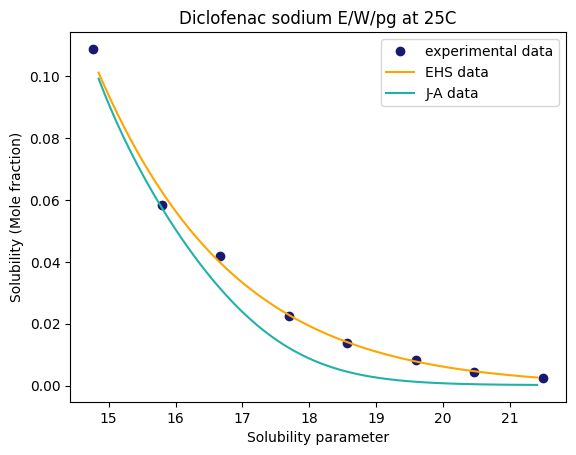

In [73]:
#Diclofenac E-W

plt.plot(spmix_T, Cm_T_D,"o", color= 'midnightblue' , label = "experimental data")
plt.plot(spmix2_T, H_T_D, color = 'orange' , label = "EHS data"  )
plt.plot(spmix2_T, J_T_D, color = 'lightseagreen'  , label = "J-A data", )

plt.title("Diclofenac sodium E/W/pg at 25C")
plt.xlabel('Solubility parameter') 
plt.ylabel('Solubility (Mole fraction)') 

plt.legend()
plt.show()



In [69]:
######## Ketoconazole at 25c


Cw = 0.0000242
Ce = 0.0916719
Cpg = 0.0490821


# density of solvent
de = 0.785
dw = 0.997
dpg = 1.0273
    # solvent Molecular weight
mw_w = 18
mw_e = 46
mw_pg = 76.09


# spE = ethanol Solubilitty parameter (cal/cm3)^0.5
spE = 13.0
# spW = water Solubilitty parameter (cal/cm3)^0.5
spW = 23.4
# spPG = PG Solubilitty parameter (cal/cm3)^0.5
spPG = 14.8


T = 298
R = 1.987

# T0 : heat fusion temp
T0 = 419.92 
# dF : heat of fusion cal/mole
dHf = 13668.38
# sp = drug Solubilitty parameter (cal/cm3)^0.5
sp = 12.42
# V2 = molar volume (cm3/mole)
V2 = 667.66



##### Ketoconazole  W/E/PG at 25c

Cm_T = [0.001468917,0.002055105,0.002261995,0.003903321,0.013359169,0.038580018,0.058638475,0.080342199]
Cm_T = np.array(Cm_T).reshape(-1,1)


Cm_T_K, MW, d = Mole_fraction(Cm_T, dw, de, dpg, mw_w, mw_e, mw_pg)
## jouyban_acree model
Sm_T = Jouyban_Acree(Cm_T, Cw, Ce, Cpg, dw, de, dpg)
J_T_K, MW, d = Mole_fraction(Sm_T, dw, de, dpg, mw_w, mw_e, mw_pg)

## EHSA model
H_T_K, spmix_T, spmix2_T = EHSA (Cm_T , T0 , dHf , sp , V2, spW, spE, spPG, dw, de, dpg, mw_w, mw_e, mw_pg)





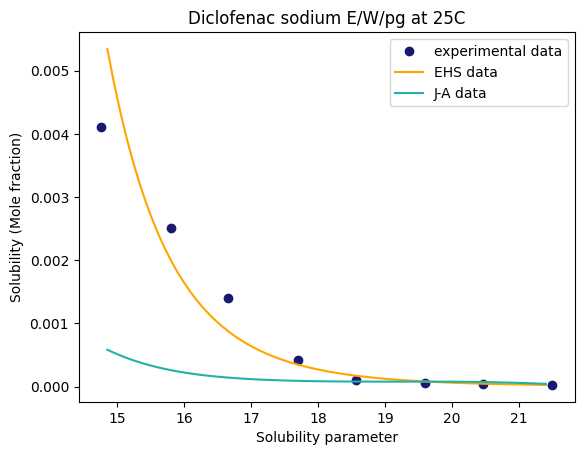

In [72]:
#Diclofenac E-W

plt.plot(spmix_T, Cm_T_K,"o", color= 'midnightblue' , label = "experimental data")
plt.plot(spmix2_T, H_T_K, color = 'orange' , label = "EHS data"  )
plt.plot(spmix2_T, J_T_K, color = 'lightseagreen'  , label = "J-A data", )

plt.title("Diclofenac sodium E/W/pg at 25C")
plt.xlabel('Solubility parameter') 
plt.ylabel('Solubility (Mole fraction)') 

plt.legend()
plt.show()



In [74]:
####### Lamotrigine at 25c


Cw = 0.000719419
Ce = 0.033340367
Cpg = 0.113777542


# density of solvent
de = 0.785
dw = 0.997
dpg = 1.0273
# solvent Molecular weight
mw_w = 18
mw_e = 46
mw_pg = 76.09


# spE = ethanol Solubilitty parameter (cal/cm3)^0.5
spE = 13.0
# spW = water Solubilitty parameter (cal/cm3)^0.5
spW = 23.4
# spPG = PG Solubilitty parameter (cal/cm3)^0.5
spPG = 14.8


T = 298
R = 1.987

# T0 : heat fusion temp
T0 = 491.01 
# dF : heat of fusion cal/mole
dHf = 9328.394
# sp = drug Solubilitty parameter (cal/cm3)^0.5
sp = 15.58
# V2 = molar volume (cm3/mole)
V2 = 162.91




##### Lamotrigine  W/E/PG at 25c

Cm_T = [0.002171521,0.004317704,0.00919133,0.018831271,0.035277894,0.074177473,0.131662406,0.168192241,]
Cm_T = np.array(Cm_T).reshape(-1,1)


Cm_T_L, MW, d = Mole_fraction(Cm_T, dw, de, dpg, mw_w, mw_e, mw_pg)
## jouyban_acree model
Sm_T = Jouyban_Acree(Cm_T, Cw, Ce, Cpg, dw, de, dpg)
J_T_L, MW, d = Mole_fraction(Sm_T, dw, de, dpg, mw_w, mw_e, mw_pg)

## EHSA model
H_T_L, spmix_T, spmix2_T = EHSA (Cm_T , T0 , dHf , sp , V2, spW, spE, spPG, dw, de, dpg, mw_w, mw_e, mw_pg)





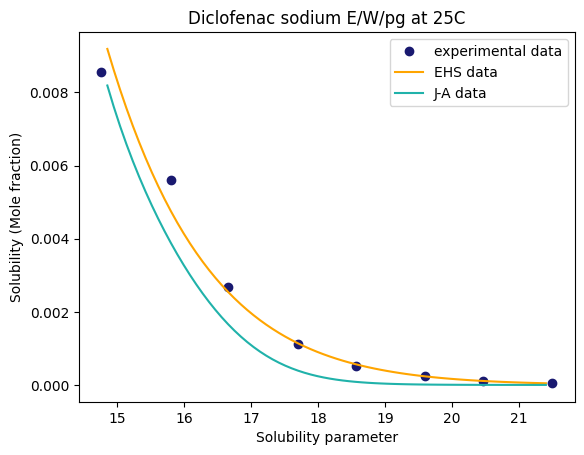

In [75]:
#Diclofenac E-W

plt.plot(spmix_T, Cm_T_L,"o", color= 'midnightblue' , label = "experimental data")
plt.plot(spmix2_T, H_T_L, color = 'orange' , label = "EHS data"  )
plt.plot(spmix2_T, J_T_L, color = 'lightseagreen'  , label = "J-A data", )

plt.title("Diclofenac sodium E/W/pg at 25C")
plt.xlabel('Solubility parameter') 
plt.ylabel('Solubility (Mole fraction)') 

plt.legend()
plt.show()



In [76]:
####### Theophylline at 25c


Cw = 0.042905934
Ce = 0.045226428
Cpg = 0.072144159


# density of solvent
de = 0.785
dw = 0.997
dpg = 1.0273
# solvent Molecular weight
mw_w = 18
mw_e = 46
mw_pg = 76.09


# spE = ethanol Solubilitty parameter (cal/cm3)^0.5
spE = 13.0
# spW = water Solubilitty parameter (cal/cm3)^0.5
spW = 23.4
# spPG = PG Solubilitty parameter (cal/cm3)^0.5
spPG = 14.8


T = 298
R = 1.987

# T0 : heat fusion temp
#T0 = 546.8 
T0 = 543.7
# dF : heat of fusion cal/mole
#dHf = 4541.11
dHf = 7456.979 

# sp = drug Solubilitty parameter (cal/cm3)^0.5
sp = 14 
# V2 = molar volume (cm3/mole)
V2 = 122.97




##### Theophylline  W/E/PG at 25c

Cm_T =[0.045922576,0.064718578,0.081658184,0.108111816,0.131293551,0.183272617,0.157283084,0.120619279]


Cm_T = np.array(Cm_T).reshape(-1,1)


Cm_T_T, MW, d = Mole_fraction(Cm_T, dw, de, dpg, mw_w, mw_e, mw_pg)
## jouyban_acree model
Sm_T = Jouyban_Acree(Cm_T, Cw, Ce, Cpg, dw, de, dpg)
J_T_T, MW, d = Mole_fraction(Sm_T, dw, de, dpg, mw_w, mw_e, mw_pg)

## EHSA model
H_T_T, spmix_T, spmix2_T = EHSA (Cm_T , T0 , dHf , sp , V2, spW, spE, spPG, dw, de, dpg, mw_w, mw_e, mw_pg)





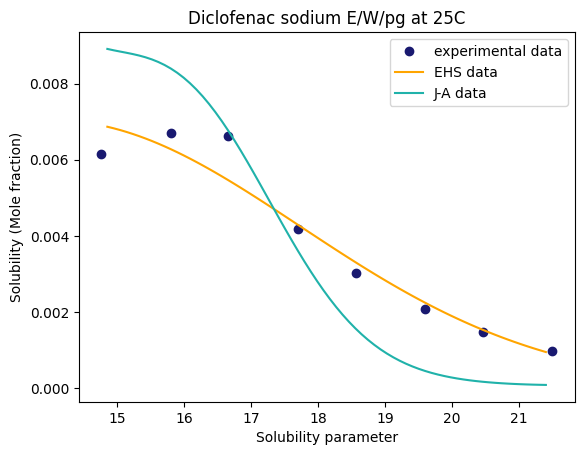

In [79]:
#Diclofenac E-W

plt.plot(spmix_T, Cm_T_T,"o", color= 'midnightblue' , label = "experimental data")
plt.plot(spmix2_T, H_T_T, color = 'orange' , label = "EHS data"  )
plt.plot(spmix2_T, J_T_T, color = 'lightseagreen'  , label = "J-A data", )

plt.title("Diclofenac sodium E/W/pg at 25C")
plt.xlabel('Solubility parameter') 
plt.ylabel('Solubility (Mole fraction)') 

plt.legend()
plt.show()



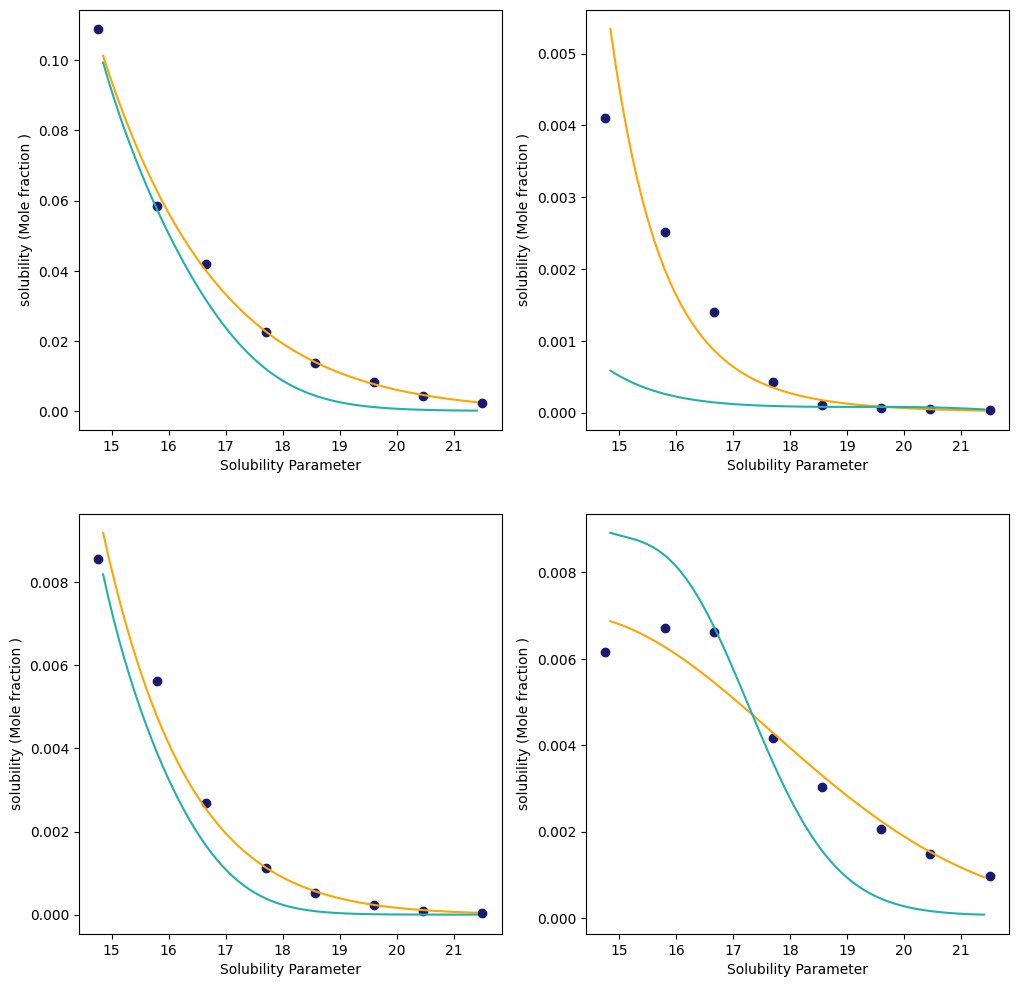

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=False , sharey=False, layout= None)

axs[0][0].plot(spmix_T, Cm_T_D,"o", color= 'midnightblue' , label = "experimental data")
axs[0][0].plot(spmix2_T, H_T_D, color = 'orange' , label = "EHS data"  )
axs[0][0].plot(spmix2_T, J_T_D, color = 'lightseagreen'  , label = "J-A data", )
axs[0][0].set_xlabel('Solubility Parameter')
axs[0][0].set_ylabel('solubility (Mole fraction )')

axs[0][1].plot(spmix_T, Cm_T_K,"o", color= 'midnightblue' , label = "experimental data")
axs[0][1].plot(spmix2_T, H_T_K, color = 'orange' , label = "EHS data"  )
axs[0][1].plot(spmix2_T, J_T_K, color = 'lightseagreen'  , label = "J-A data", )
axs[0][1].set_xlabel('Solubility Parameter')
axs[0][1].set_ylabel('solubility (Mole fraction )')

axs[1][0].plot(spmix_T, Cm_T_L,"o", color= 'midnightblue' , label = "experimental data")
axs[1][0].plot(spmix2_T, H_T_L, color = 'orange' , label = "EHS data"  )
axs[1][0].plot(spmix2_T, J_T_L, color = 'lightseagreen'  , label = "J-A data", )
axs[1][0].set_xlabel('Solubility Parameter')
axs[1][0].set_ylabel('solubility (Mole fraction )')

axs[1][1].plot(spmix_T, Cm_T_T,"o", color= 'midnightblue' , label = "experimental data")
axs[1][1].plot(spmix2_T, H_T_T, color = 'orange' , label = "EHS data"  )
axs[1][1].plot(spmix2_T, J_T_T, color = 'lightseagreen'  , label = "J-A data", )
axs[1][1].set_xlabel('Solubility Parameter')
axs[1][1].set_ylabel('solubility (Mole fraction )')


plt.savefig("ternary.jpg", bbox_inches = 'tight', dpi = 300)
